In [89]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [90]:
#dataload
BRCA1_raw = pd.read_csv("BRCA1_HUMAN_Findlay_2018.csv")

# Domainsplit: BRCA1_raw -> RING & BRCT

In [91]:
#code to split our dataframe into its domains

RING = BRCA1_raw[:575]
BRCT = BRCA1_raw[575:]

# Secondary structure analysis

In [92]:
# add column named: 'position'
df=BRCA1_raw.copy()

import re 

def get_number_from_text(text):
    return re.findall(r'\d{1,4}',text)[0]

df['position']=df['mutant'].apply(get_number_from_text)

In [93]:
# add column containing the newly introduced Aminoacid
test1=df.mutant.str.extract(r'(\d)([ARNDCQEGHILKTMfPOUSTWYV])')
df["new_aa"]=test1[1]

In [94]:
# dataset with only bin0s
df_filtered = df[df['DMS_score_bin'] == 0]

In [95]:
#CHECKING FOR SECONDARY STRUCTURES -> based on Psipred

#Helices:
helices = ['8', '9', '10',"11","12","13","14","15","16","17","18","19","20","21","22","28","29","30","31","41","42","43","44","45","46","47","48","49","50","51","52","70","71","72","73","78","79","80","81","82","83","84","85","86","87","88","89","90","91","92","93","94","95","96","97","1659","1660","1661","1662","1663","1664","1665","1666","1667","1668","1669","1670","1671","1701","1702","1703","1704","1705","1706","1707","1708","1716","1717","1718","1719","1720","1721","1722","1723","1724","1725","1749","1750","1751","1752","1753","1754","1755","1777","1778","1779","1780","1781","1782","1783","1784","1785","1786","1820","1821","1822","1823","1824","1825","1826","1827","1835","1836","1837","1838","1839","1840","1841","1842","1843","1844"]
helices_df = df.loc[df['position'].astype(str).isin(helices)]

#Helices_bin0:
helices_df_bin0 = helices_df.loc[helices_df['DMS_score_bin'] == 0].copy()

#Strands:
strands = ["1650","1651","1652","1653","1654","1674","1675","1676","1677","1684","1685","1686","1687","1688","1689","1712","1713","1714","1715","1765","1766","1767","1768","1769","1807","1808","1809","1810"]
strands_df = df.loc[df['position'].astype(str).isin(strands)]

#Strands_bin0:
strands_df_bin0 = strands_df.loc[strands_df['DMS_score_bin'] == 0].copy()

#Coils (improved technique :D):
df['position'] = df['position'].astype(int)
coils = list(range(1, 8)) + list(range(22, 35)) + list(range(37, 45))+ list(range(55, 67)) + list(range(69, 77)) + list(range(98, 102)) + list(range(1631, 1651))+ list(range(1656, 1660)) + list(range(1673, 1676)) + list(range(1679, 1686)) + list(range(1691, 1702)) + list(range(1710, 1715))+ list(range(1727, 1736))+ list(range(1738, 1753))+ list(range(1757, 1767))+ list(range(1771, 1778))+ list(range(1788, 1791))+ list(range(1794, 1796))+ list(range(1799, 1806))+ list(range(1812, 1821))+ list(range(1829, 1833))+ list(range(1846, 1851))+ list(range(1854, 1865))
coils_df = df.loc[df['position'].isin(coils)]

#Coils_bin0:
coils_df_bin0 = coils_df.loc[coils_df['DMS_score_bin'] == 0].copy()

# Testing for overlaps:
set1 = set(helices)
set2 = set(strands)
set3 = set(coils)

common_elements = set1.intersection(set2, set3)

common_elements_list = list(common_elements)
common_elements_list

#-> no overlaps, yay


[]

## RING

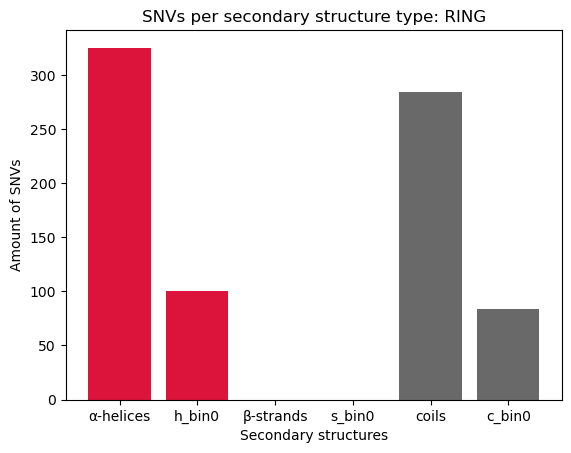

ratio: helices_bin0_R to helices_R: 30.77%
ratio: coils_bin0_R to coils_R: 29.58%


In [96]:
#RING:

#Helices in RING
helices_RING = ['8', '9', '10',"11","12","13","14","15","16","17","18","19","20","21","22","28","29","30","31","41","42","43","44","45","46","47","48","49","50","51","52","70","71","72","73","78","79","80","81","82","83","84","85","86","87","88","89","90","91","92","93","94","95","96","97"]
helices_df_RING = df.loc[df['position'].astype(str).isin(helices_RING)]
helices_df_RING_bin0 = helices_df_RING.loc[helices_df_RING['DMS_score_bin'] == 0].copy()

#strands in RING (there are none)

#coils in RING
df['position'] = df['position'].astype(int)
coils_RING = list(range(1, 8)) + list(range(22, 35)) + list(range(37, 45))+ list(range(55, 67)) + list(range(69, 77)) + list(range(98, 102)) 
coils_df_RING = df.loc[df['position'].isin(coils_RING)]
coils_df_RING_bin0 = coils_df_RING.loc[coils_df_RING['DMS_score_bin'] == 0].copy()

#Barplot + ratios: 
df_counts = [len(helices_df_RING),len(helices_df_RING_bin0),0,0, len(coils_df_RING),len(coils_df_RING_bin0)]
df_names = ['α-helices',"h_bin0", 'β-strands',"s_bin0",'coils',"c_bin0"]
colors = ['crimson', 'crimson', 'indigo', 'indigo', 'dimgrey', 'dimgrey']
plt.bar(df_names, df_counts,color=colors)
plt.xlabel('Secondary structures')
plt.ylabel('Amount of SNVs')
plt.title('SNVs per secondary structure type: RING')
plt.show()
dataframes = [helices_df_RING, helices_df_RING_bin0, coils_df_RING, coils_df_RING_bin0]
df_names = ['helices_R', 'helices_bin0_R', 'coils_R', 'coils_bin0_R']
ratios = []
for i in range(1, len(dataframes), 2):
    ratio = (len(dataframes[i]) / len(dataframes[i-1])) * 100
    ratios.append(ratio)
for i, ratio in enumerate(ratios):
    print(f"ratio: {df_names[i*2+1]} to {df_names[i*2]}: {ratio:.2f}%")



In [97]:
#Chi2, RING:
#H0: no correlation
len_hRING=len(helices_df_RING)
len_hRING0=len(helices_df_RING_bin0)
len_cRING=len(coils_df_RING)
len_cRING0=len(coils_df_RING_bin0)

observed_data_RING = np.array([[len_cRING, len_hRING],[len_cRING0, len_hRING0]])
chi2, p_value, dof, expected = chi2_contingency(observed_data_RING)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p_value}")
print(f"Degrees of freedom: {dof}")
print("Expected counts:")
print(expected)

Chi-square statistic: 0.022393889272595308
P-value: 0.8810440090537792
Degrees of freedom: 1
Expected counts:
[[282.61286255 326.38713745]
 [ 85.38713745  98.61286255]]


Since the P-value is >0.05 there is no strong indication to reject the H0 hypothesis. So in this domain the chances of a SNV leading to a bin_0 score is the same no matter what secondary structure.


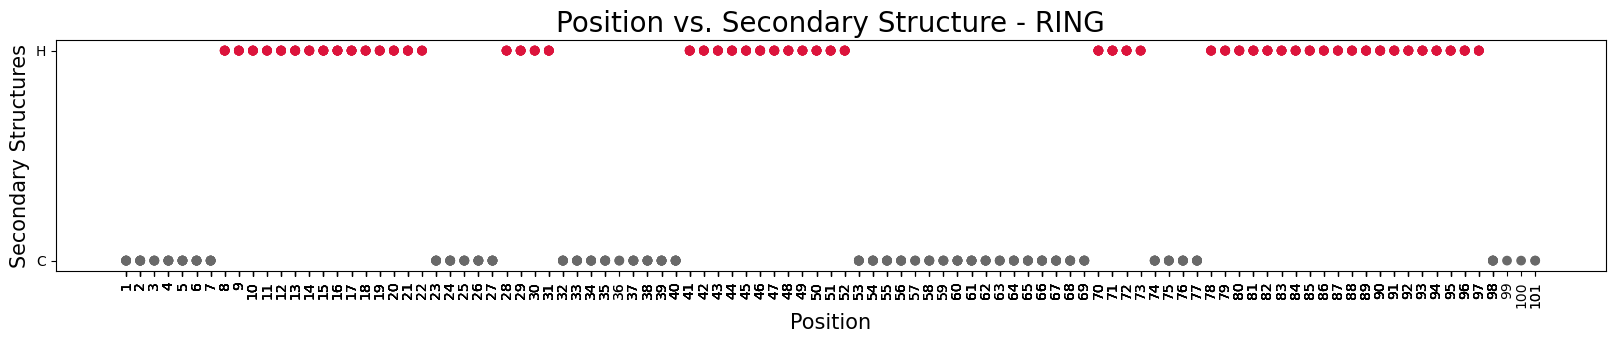

In [98]:
#Vizualizing secondary structures in RING

RING = df[:575]
new_RING = RING.copy()
new_RING['secondary structures'] = RING['position'].apply(lambda x: 'H' if str(x) in helices_RING else 'C')

positions = new_RING['position']
structures = new_RING['secondary structures']

colors = ['crimson' if structure == 'H' else 'dimgrey' for structure in structures]

# scatter plot:
plt.scatter(positions, structures, c=colors)
plt.xticks(positions, rotation='vertical')
plt.xlabel('Position', fontsize=15)
plt.ylabel('Secondary Structures', fontsize=15)
plt.title('Position vs. Secondary Structure - RING', fontsize=20)
fig = plt.gcf()
fig.set_size_inches(20, 3)
plt.gca().yaxis.set_tick_params(labelsize=10)
plt.show()

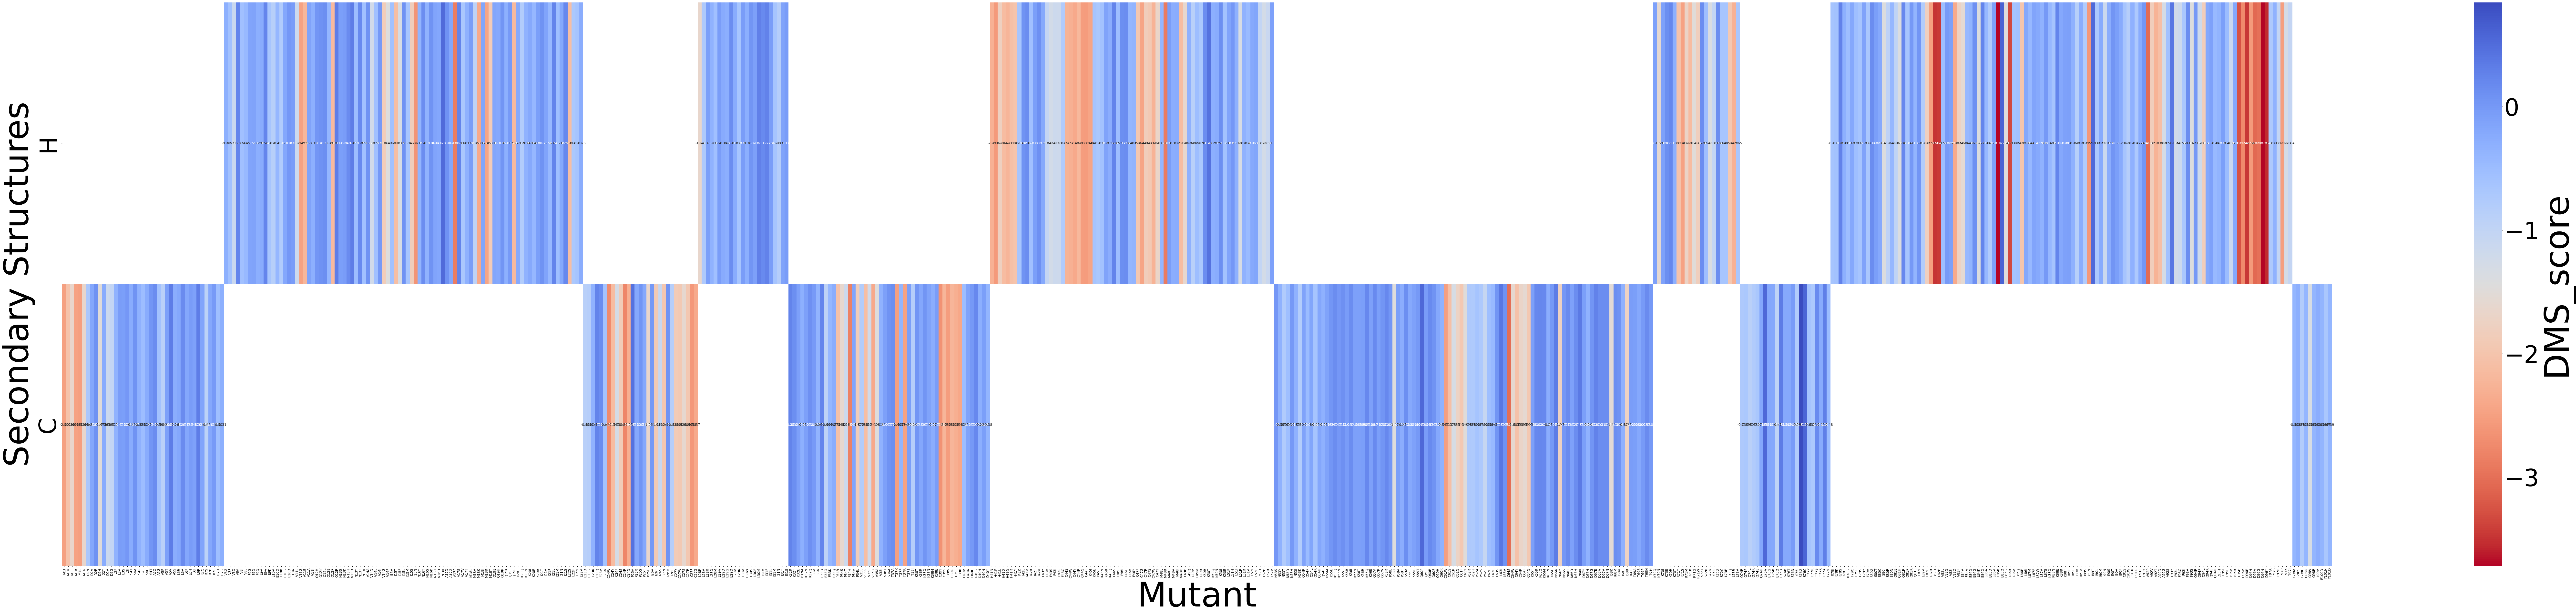

In [99]:
#secondary structure + dms score_RING:
new_RING_agg = new_RING.pivot_table(index='secondary structures', columns='mutant', values='DMS_score')

# Get the order of mutants from the original DataFrame
mutant_order = new_RING['mutant'].unique()

# Reindex the columns of the pivot table to match the desired order
new_RING_agg = new_RING_agg.reindex(index=new_RING_agg.index[::-1],columns=mutant_order)

# Plot creation
plt.figure(figsize=(150, 30)) 

# heatmap
heatmap=sns.heatmap(new_RING_agg, cmap="coolwarm_r", annot=True, fmt=".2f",cbar_kws={"label":"DMS_scores"})
plt.xlabel("Mutant", fontsize=100) 
plt.ylabel("Secondary Structures", fontsize=100) 
 
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=70) 
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=70)
cbar.ax.set_ylabel('DMS_score', fontsize=100)

plt.show()




## BRCT

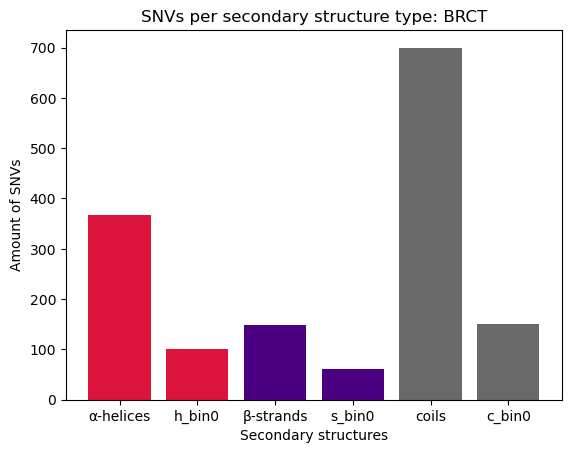

ratio: h_bin0_B to helices_B: 27.45%
ratio: s_bin0_B to strands_B: 40.54%
ratio: coils_bin0_B to coils_B: 21.57%


In [100]:
#BRCT:

#Helices in BRCT
helices_BRCT = ["1659","1660","1661","1662","1663","1664","1665","1666","1667","1668","1669","1670","1671","1701","1702","1703","1704","1705","1706","1707","1708","1716","1717","1718","1719","1720","1721","1722","1723","1724","1725","1749","1750","1751","1752","1753","1754","1755","1777","1778","1779","1780","1781","1782","1783","1784","1785","1786","1820","1821","1822","1823","1824","1825","1826","1827","1835","1836","1837","1838","1839","1840","1841","1842","1843","1844"]
helices_df_BRCT = df.loc[df['position'].astype(str).isin(helices_BRCT)]
helices_df_BRCT_bin0 = helices_df_BRCT.loc[helices_df_BRCT['DMS_score_bin'] == 0].copy()

#strands in BRCT
strands_BRCT = ["1650","1651","1652","1653","1654","1674","1675","1676","1677","1684","1685","1686","1687","1688","1689","1712","1713","1714","1715","1765","1766","1767","1768","1769","1807","1808","1809","1810"]
strands_df_BRCT = df.loc[df['position'].astype(str).isin(strands_BRCT)]
strands_df_BRCT_bin0 = strands_df_BRCT.loc[strands_df_BRCT['DMS_score_bin'] == 0].copy()

#coils in BRCT
df['position'] = df['position'].astype(int)
coils_BRCT = list(range(1631, 1651))+ list(range(1656, 1660)) + list(range(1673, 1676)) + list(range(1679, 1686)) + list(range(1691, 1702)) + list(range(1710, 1715))+ list(range(1727, 1736))+ list(range(1738, 1753))+ list(range(1757, 1767))+ list(range(1771, 1778))+ list(range(1788, 1791))+ list(range(1794, 1796))+ list(range(1799, 1806))+ list(range(1812, 1821))+ list(range(1829, 1833))+ list(range(1846, 1851))+ list(range(1854, 1865)) 
coils_df_BRCT = df.loc[df['position'].isin(coils_BRCT)]
coils_df_BRCT_bin0 = coils_df_BRCT.loc[coils_df_BRCT['DMS_score_bin'] == 0].copy()

#Barplot+ratios:
df_counts = [len(helices_df_BRCT),len(helices_df_BRCT_bin0),len(strands_df_BRCT),len(strands_df_BRCT_bin0), len(coils_df_BRCT),len(coils_df_BRCT_bin0)]
df_names = ['α-helices',"h_bin0", 'β-strands',"s_bin0",'coils',"c_bin0"]
colors = ['crimson', 'crimson', 'indigo', 'indigo', 'dimgrey', 'dimgrey']
plt.bar(df_names, df_counts,color=colors)
plt.xlabel('Secondary structures')
plt.ylabel('Amount of SNVs')
plt.title('SNVs per secondary structure type: BRCT')
plt.show()
dataframes = [helices_df_BRCT, helices_df_BRCT_bin0, strands_df_BRCT,strands_df_BRCT_bin0,coils_df_BRCT, coils_df_BRCT_bin0]
df_names = ['helices_B', 'h_bin0_B',"strands_B","s_bin0_B", 'coils_B', 'coils_bin0_B']
ratios = []
for i in range(1, len(dataframes), 2):
    ratio = (len(dataframes[i]) / len(dataframes[i-1])) * 100
    ratios.append(ratio)
for i, ratio in enumerate(ratios):
    print(f"ratio: {df_names[i*2+1]} to {df_names[i*2]}: {ratio:.2f}%")

In [101]:
#Chi2, BRCT:
#H0: no correlation
len_hBRCT=len(helices_df_BRCT)
len_hBRCT0=len(helices_df_BRCT_bin0)
len_cBRCT=len(coils_df_BRCT)
len_cBRCT0=len(coils_df_BRCT_bin0)
len_sBRCT=len(strands_df_BRCT)
len_sBRCT0=len(strands_df_BRCT_bin0)

observed_data_BRCT = np.array([[len_cBRCT, len_hRING, len_sBRCT],[len_cBRCT0, len_hBRCT0, len_sBRCT0]])
chi2, p_value, dof, expected = chi2_contingency(observed_data_BRCT)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p_value}")
print(f"Degrees of freedom: {dof}")
print("Expected counts:")
print(expected)

Chi-square statistic: 15.036107804784002
P-value: 0.0005431886360097251
Degrees of freedom: 2
Expected counts:
[[672.2040404 336.4969697 164.2989899]
 [178.7959596  89.5030303  43.7010101]]


Since the P-value is <0.05 there is a strong indication to reject the H0 hypothesis. So in this domain the chances of a SNV leading to a bin_0 score is different for each secondary structure.

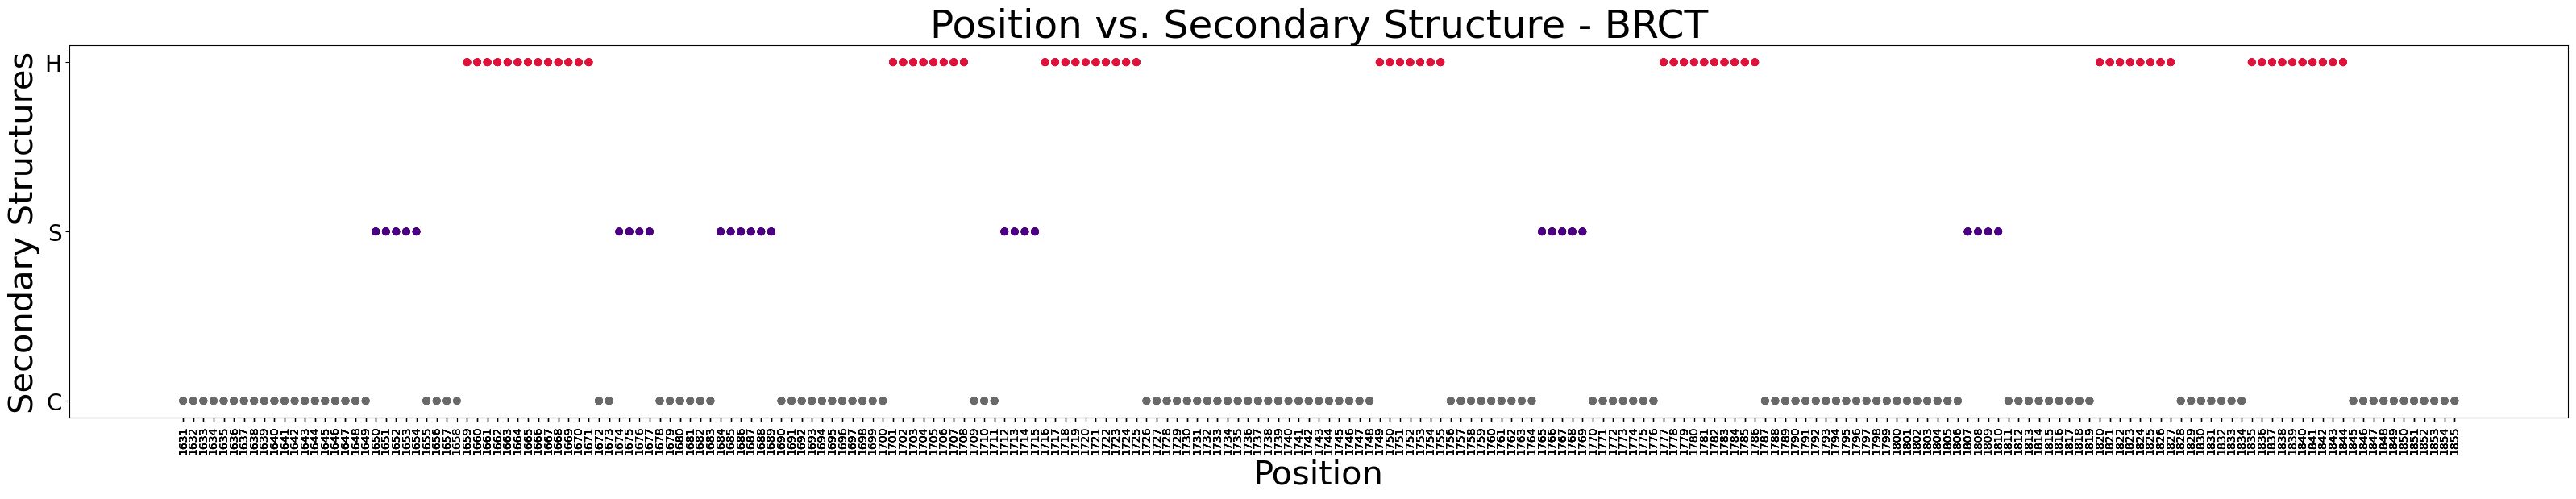

In [102]:
#Vizualizing the secondary structures in BRCT
BRCT = df[575:]
new_BRCT = BRCT.copy()
new_BRCT['secondary structures'] = BRCT['position'].apply(lambda x: 'S' if str(x) in strands_BRCT else ('H' if str(x) in helices_BRCT else'C'))

positions = new_BRCT['position']
structures = new_BRCT['secondary structures']

colors = ['crimson' if structure == 'H' else 'dimgrey' if structure=="C" else "indigo" for structure in structures]

# scatter plot:
plt.scatter(positions, structures, c=colors)
plt.xticks(positions, rotation='vertical')
plt.xlabel('Position', fontsize=30)
plt.ylabel('Secondary Structures', fontsize=30)
plt.title('Position vs. Secondary Structure - BRCT', fontsize=35)
fig = plt.gcf()
fig.set_size_inches(40, 6)
plt.gca().yaxis.set_tick_params(labelsize=20)
plt.show()




In [103]:
#secondary structures + dms score_BRCT:

# Remove duplicates or aggregate the data
new_BRCT_agg = new_BRCT.pivot_table(index='secondary structures', columns='mutant', values='DMS_score')

# Get the order of mutants from the original DataFrame
mutant_order1 = new_BRCT['mutant'].unique()

# Reindex the columns of the pivot table to match the desired order
new_BRCT_agg = new_BRCT_agg.reindex(index=new_BRCT_agg.index[::-1],columns=mutant_order1)

structure_order = new_BRCT_agg.index.tolist()
structure_order[0], structure_order[1] = structure_order[1], structure_order[0]
new_BRCT_agg = new_BRCT_agg.reindex(index=structure_order)

# Plot creation
plt.figure(figsize=(230, 50))  # Adjust the size of the plot
heatmap=sns.heatmap(new_BRCT_agg, cmap="coolwarm_r", annot=True, fmt=".2f",cbar_kws={"label":"DMS_scores"})
plt.xlabel("Mutant", fontsize=130)
plt.ylabel("Secondary Structures",fontsize=130)

heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=80) 
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=80)
cbar.ax.set_ylabel('DMS_score', fontsize=130)

plt.show()




# Conservation Analysis


In [ ]:
#importing the data from the msa

fasta_file = {}
key = None
value = ['']
with open(r"C:\Users\felix\OneDrive\Desktop\aln-fasta_final.txt",'r') as f:
    for line in f:
        if line.startswith('>'):
            fasta_file[key] = "".join(value)
            reading=True
            key = line.strip()
            value = []
            continue
        else:
            value.append(line.strip())

In [ ]:
#create sequence logo with full sequence


def create_sequence_logo(sequence_data, split_positions=None, columns=1, figsize=(16, 8), scaling_factor=0.04):

    amino_acids_to_plot = ['-',"A","R","N","D","C","Q","E","G","H","I","L","K","M","F","P","S","T","W","Y","V",'X']
    # Filter out empty sequences
    sequence_data = {k: v for k, v in sequence_data.items() if v}

    # Calculate the maximum length of the sequences
    max_length = max(len(seq) for seq in sequence_data.values())

    # Create a dictionary to store the frequency of each amino acid at each position
    amino_acid_frequencies = {aa: [0] * max_length for aa in amino_acids_to_plot}

    # Iterate over the sequences and update the amino acid frequencies
    for sequence in sequence_data.values():
        for i, aa in enumerate(sequence):
            amino_acid_frequencies[aa][i] += 1

    # Determine the splitting positions
    if split_positions is None:
        split_positions = [0, max_length]

    # Adjust the number of columns if needed
    num_plots = len(split_positions) - 1
    rows = num_plots // columns + (num_plots % columns > 0)

    # Create subplots with increased vertical gap
    fig, axs = plt.subplots(rows, columns, figsize=figsize, squeeze=False, gridspec_kw={'hspace': 0.5})
    axs = axs.ravel()

    # Plotting the amino acid frequencies by position for each subset
    term = False
    for i, ax in enumerate(axs):
        start = split_positions[i]

        if i == num_plots-1:  # Handle the last subset separately
            print('end')
            end = max_length
            term = True

        else:
            end = split_positions[i + 1]
        subset_data = {k: v[start:end] for k, v in sequence_data.items()}

        # Plotting the amino acid frequencies by position for each amino acid
        for aa in amino_acids_to_plot:
            frequencies = amino_acid_frequencies[aa][start:end]

            if any(frequencies):
                ax.plot(range(1, len(frequencies) + 1), [f * scaling_factor for f in frequencies], label=aa)

        ax.set_xlim(1, end - start + 1)
        ax.set_xticks(range(1, end - start + 1))
        ax.set_xticklabels(range(start + 1, end + 1))
        ax.set_xlabel('Position')
        ax.set_ylabel('Frequency')

        ax.set_title(f"Sequence Logo - Position {start+1}-{end}")
        if term:
            break
    # Create a single legend outside the loop
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='center', ncol=1)
#     fig.legend(handles, labels,  loc=(1.04, 0))

#     plt.tight_layout()
    plt.show()

split_positions = [0,  max(len(seq) for seq in fasta_file.values())]  # Manually specify splitting positions

create_sequence_logo(fasta_file, split_positions=split_positions, columns=2, figsize=(150, 10), scaling_factor=0.011)

In [ ]:
#create sequence logo with split sequence

def create_sequence_logo(sequence_data, split_positions=None, columns=1, figsize=(16, 8), scaling_factor=0.04):

    amino_acids_to_plot = ['-',"A","R","N","D","C","Q","E","G","H","I","L","K","M","F","P","S","T","W","Y","V",'X']
    # Filter out empty sequences
    sequence_data = {k: v for k, v in sequence_data.items() if v}

    # Calculate the maximum length of the sequences
    max_length = max(len(seq) for seq in sequence_data.values())

    # Create a dictionary to store the frequency of each amino acid at each position
    amino_acid_frequencies = {aa: [0] * max_length for aa in amino_acids_to_plot}

    # Iterate over the sequences and update the amino acid frequencies
    for sequence in sequence_data.values():
        for i, aa in enumerate(sequence):
            amino_acid_frequencies[aa][i] += 1

    # Determine the splitting positions
    if split_positions is None:
        split_positions = [0, max_length]

    # Adjust the number of columns if needed
    num_plots = len(split_positions) - 1
    rows = num_plots // columns + (num_plots % columns > 0)

    # Create subplots with increased vertical gap
    fig, axs = plt.subplots(rows, columns, figsize=figsize, squeeze=False, gridspec_kw={'hspace': 0.5})
    axs = axs.ravel()

    # Plotting the amino acid frequencies by position for each subset
    term = False
    for i, ax in enumerate(axs):
        start = split_positions[i]

        if i == num_plots-1:  # Handle the last subset separately
            print('end')
            end = max_length
            term = True

        else:
            end = split_positions[i + 1]
        subset_data = {k: v[start:end] for k, v in sequence_data.items()}

        # Plotting the amino acid frequencies by position for each amino acid
        for aa in amino_acids_to_plot:
            frequencies = amino_acid_frequencies[aa][start:end]

            if any(frequencies):
                ax.plot(range(1, len(frequencies) + 1), [f * scaling_factor for f in frequencies], label=aa)

        ax.set_xlim(1, end - start + 1)
        ax.set_xticks(range(1, end - start + 1))
        ax.set_xticklabels(range(start + 1, end + 1))
        ax.set_xlabel('Position')
        ax.set_ylabel('Frequency')

        ax.set_title(f"Sequence Logo - Position {start+1}-{end}")
        if term:
            break
    # Create a single legend outside the loop
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='center', ncol=1)
#     fig.legend(handles, labels,  loc=(1.04, 0))

#     plt.tight_layout()
    plt.show()

split_positions = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, max(len(seq) for seq in fasta_file.values())]  # Manually specify splitting positions

create_sequence_logo(fasta_file, split_positions=split_positions, columns=2, figsize=(50, 30), scaling_factor=0.011)

In [ ]:
#create a consensus sequence

def create_consensus_sequence(sequence_data):
    # Filter out empty sequences
    sequence_data = {k: v for k, v in sequence_data.items() if v}

    # Calculate the maximum length of the sequences
    max_length = max(len(seq) for seq in sequence_data.values())

    # Create a dictionary to store the frequency of each amino acid at each position
    amino_acid_frequencies = {aa: [0] * max_length for aa in set(''.join(sequence_data.values()))}

    # Iterate over the sequences and update the amino acid frequencies
    for sequence in sequence_data.values():
        for i, aa in enumerate(sequence):
            amino_acid_frequencies[aa][i] += 1

    # Create the consensus sequence
    consensus_sequence = ''
    for i in range(max_length):
        max_frequency = 0
        max_amino_acid = ''
        for aa, frequencies in amino_acid_frequencies.items():
            frequency = frequencies[i]
            if frequency > max_frequency:
                max_frequency = frequency
                max_amino_acid = aa
        consensus_sequence += max_amino_acid

    return consensus_sequence



consensus_sequence = create_consensus_sequence(fasta_file)
print("consensus_sequence:", consensus_sequence)


In [ ]:
#define the sequence of human BRCA1

brca_human="---------------------------------------------------------------------------------------------------------------------MDLSALRVEEVQNVINAMQK---ILECPICLELIKEPVSTKCD-HIFCK---------FCMLKLLNQKKGPSQCPLCKNDITKRSLQESTRFSQLVEELLKIICAFQLD---TGLEYAN-SYNFAKK-ENNSPEHLK-DEVSIIQSMGYRNRAKRLLQSEPENPSL--------QETSLSVQLSNLGTVRTLRTKQRIQPQKTSVYIELGSDSSEDTVNKATYCSVGDQELLQITPQGTRDEI---------------SLDSAKK--AACEFSETDVTNTEHHQPSNNDLNTTE-KRAAERHPEKYQGSSVSNLHVEPCGTNTHASSLQHENSSLLLTKDRMNVEKAEFCNKSKQPGLARSQHNRWAGSKETCNDRRTPSTEKKVDLNADPLCERKEWNKQKLPCSENPRD-TEDVPWITLNSSIQKVNEWFSRSDELLGSD-DSHDGESESNAKVADVLDV-------------------LNEVDEYSGSSEKIDLLASDPHEALICKSERVHSKSVESNIEDKIFGKTYRKKASLPNLSHV--TENLIIGAFVTEPQI-IQERPLTNKLKRKRRPTSGLHPEDFIKKADLAV-QKTPEMINQGTNQTEQNGQVMNITNSGHENKTKGDSIQNEKNPNPIESLEKESAFKTKAEPISSSISNMELELNIHNSKAPKKNRLRRKSSTRHIHALELVVSRNLSPPNCTELQIDSCSSSEEIKK-KKYNQMPVRHSRNLQLMEGKEPATGAKKSNKPNEQTSKRHDSDTFPELKLTNAPGSFTKCSNTSELKEFVNPSLPREEKEEKLETVKVSNNAEDPKDLMLSGE-RVLQTE---RSVESSSISLVPGTDYGTQESISLLEVSTLGKAKT-EPNKCVSQCAAFENPKGLIHGCSKDNRNDTEGFKYPLGHEVNH-SRETSIEMEESELDAQYLQNTFKVSKRQSFAPFSNPGNAEEECATFSAHSGSLKKQSPKVTFECEQKEENQGKN-ESNIKPVQTVNITAGFPVVGQKDKP-VDNAKCS--IKGGSRFCLSSQFRGNETGLITPNKHGLLQNPYRIPPLFPIKSFVKTKCKKNLLEENFEEHSMSPEREMGNEN-IPSTVSTISRNNIRENVFKEASSSNINEVGSST-------NEVGSSINEIGSSDENIQAELGRNRGPKLNAMLRLGVLQPEVYKQSLPGSNCKHPEIKKQEY-EEVVQTVNTDFSPYLISDNLEQPMGSSHASQVCSETPDDLLDD--GEIKEDTSFAENDIKESSAVFSKSVQKGELSRSPSPFTH-THLAQGYR-RGAKKLESSEENLSSEDEELPCFQHLLFGKVNNIPS-QSTRHSTVATECLSKNTEENLLSLKNSLNDC--SNQVILAKASQEHHLSEETKCSASLFSSQCSELEDLTANT--------NTQDPFLIG--SSKQMRHQSESQGVGLSDKELVSDD----EERGTGLEENN-QEEQSMDSN-LGEAASGCESETSVSEDCSGLSSQSDILTTQ-------QRDTMQHNLIKLQQEMAELEAVLEQHGSQPS-NSYPSIISDSSA--LEDLRNPEQSTSEK---------------------AVLTSQKSSEYPISQNPEGLSADKFEVSADSSTSK-NKEPGVER---------------------SSPSKCPSL-DDRWYMHSCSGSLQNRNYPSQEELIKVVDVEEQQLEES-------------GPHDLTETSYLPRQDLEGTP-YLESGISLFSDDPESDPSEDRAPESARVGNIPSSTSALKVPQLKVAESAQSPAAAHTTDTAGYNAMEESVSREKPELTASTER-VNKRMSMVVSGLTPEEFMLVYKFARKHHITLTNLITEETTHVVMKTDAEFVCERTLKYFLGIAGGKWVVSYFWVTQSIKERKMLNEHDFEVRGDVVNGRNHQGPKRARES-----QDRKIFRGLEICCYGPFTNMPT-------------------------------------------------------------------------DQLEWMVQLCGASVVKELSSFTLGTG---VHPIVVVQPDAWTEDNGFHAIGQMCEAPVVTREWVLDSVALYQCQELDT---YLIPQIPHSHY-----------------------------------"

In [ ]:
#create comparison between human BRCA1 and the consensus sequence

def compare_sequences(consensus_sequence, other_sequence, split_positions=None, columns=1, figsize=(16, 8)):
    # Check if the sequences have the same length
    if len(consensus_sequence) != len(other_sequence):
        print("Sequences have different lengths.")
        return

    # Determine the splitting positions
    if split_positions is None:
        split_positions = [0, len(consensus_sequence)]

    # Adjust the number of columns if needed
    num_plots = len(split_positions) - 1
    rows = num_plots // columns + (num_plots % columns > 0)

    # Create subplots
    fig, axs = plt.subplots(rows, columns, figsize=figsize, squeeze=False)
    axs = axs.ravel()

    # Iterate over the subsets
    for i, ax in enumerate(axs):
        start = split_positions[i]
        end = split_positions[i + 1]

        # Create a plot to visualize the sequences within the subset
        for j in range(start, end):
            consensus_aa = consensus_sequence[j]
            other_aa = other_sequence[j]
            if consensus_aa == other_aa:
                ax.text(j - start, 0.5, consensus_aa, color='green', fontsize=60, ha='center')
            else:
                ax.text(j - start, 0.7, consensus_aa, color='green', fontsize=60, ha='center')
                ax.text(j - start, 0.3, other_aa, color='red', fontsize=60, ha='center')

        # Set plot properties for each subset
        ax.set_xlim(-0.5, end - start - 0.5)
        ax.set_ylim(0, 1)
        ax.set_xticks(range(end - start))
        ax.set_yticks([])
        ax.set_xlabel('Position')
        ax.set_title(f'Subset {i+1}')

    plt.tight_layout()
    plt.show()

# Example usage:

split_positions = [0, len(consensus_sequence)]  # Manually specify splitting positions

compare_sequences(consensus1, brca_human, split_positions=split_positions, columns=2, figsize=(200, 30))


In [ ]:
#split up again

def compare_sequences(consensus_sequence, other_sequence, split_positions=None, columns=1, figsize=(16, 8)):
    # Check if the sequences have the same length
    if len(consensus_sequence) != len(other_sequence):
        print("Sequences have different lengths.")
        return

    # Determine the splitting positions
    if split_positions is None:
        split_positions = [0, len(consensus_sequence)]

    # Adjust the number of columns if needed
    num_plots = len(split_positions) - 1
    rows = num_plots // columns + (num_plots % columns > 0)

    # Create subplots
    fig, axs = plt.subplots(rows, columns, figsize=figsize, squeeze=False)
    axs = axs.ravel()

    # Iterate over the subsets
    for i, ax in enumerate(axs):
        start = split_positions[i]
        end = split_positions[i + 1]

        # Create a plot to visualize the sequences within the subset
        for j in range(start, end):
            consensus_aa = consensus_sequence[j]
            other_aa = other_sequence[j]
            if consensus_aa == other_aa:
                ax.text(j - start, 0.5, consensus_aa, color='green', fontsize=20, ha='center')
            else:
                ax.text(j - start, 0.7, consensus_aa, color='green', fontsize=20, ha='center')
                ax.text(j - start, 0.3, other_aa, color='red', fontsize=20, ha='center')

        # Set plot properties for each subset
        ax.set_xlim(-0.5, end - start - 0.5)
        ax.set_ylim(0, 1)
        ax.set_xticks(range(end - start))
        ax.set_yticks([])
        ax.set_xlabel('Position')
        ax.set_title(f'Subset {i+1}')

    plt.tight_layout()
    plt.show()

# Example usage:

split_positions = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, len(consensus_sequence)]  # Manually specify splitting positions

compare_sequences(consensus1, brca_human, split_positions=split_positions, columns=2, figsize=(50, 30))
